# Graph Learning



In [1]:
def PlotGraph(graphin,ax, weight='weight',pos='coord',annotate="name"): 
    
    # the numpy array x will hold the horizontal coord of markers for each node in emp. graph graphin
    x = np.zeros(len(graphin.nodes))
    # vertical coords of markers 
    y = np.zeros(len(graphin.nodes))
    
    for iter_node in graphin.nodes:
        x[iter_node]= graphin.nodes[iter_node][pos][0] 
        y[iter_node]= graphin.nodes[iter_node][pos][1]

    # standareize the coordinates of node markers 
    
    x = (x - np.min(x, axis=0))/np.std(x, axis=0) + 1 
    y = (y - np.min(y, axis=0))/np.std(y, axis=0) + 1 

    
    # generate a scatter plot with each marker representing a node in graphin
    ax.scatter(x, y, 300, marker='o', color='Black')

# draw links between two nodes if they are connected by an edge 
# in the empirical graph. use the "weight" of the edge to determine the line thickness
    for edge_dmy in graphin.edges:
        ax.plot([x[edge_dmy[0]],x[edge_dmy[1]]],[y[edge_dmy[0]],y[edge_dmy[1]]],c='black',lw=4*graphin.edges[edge_dmy][weight])

    # annotate each marker by the node attribute whose name is stored in the input parameter "annotate"
    for iter_node in graphin.nodes : 
        ax.annotate(str(graphin.nodes[iter_node][annotate]),(x[iter_node]+0.1, 0.1+y[iter_node]),c="red" )
    ax.set_ylim(0.9*np.min(y),1.1*np.max(y))
    ax.set_xlim(0.9*np.min(x),1.1*np.max(x))
    ax.axis('off')

In [2]:
# Define a function to compute the KL divergence between two multivariate normal distributions
def kl_divergence(dist1, dist2):
    n = dist1.mean.shape[0]
    term1 = 0.5 * (np.log(np.linalg.det(dist2.cov) / np.linalg.det(dist1.cov)))
    term2 = 0.5 * np.trace(np.linalg.inv(dist2.cov) @ dist1.cov)
    term3 = 0.5 * ((dist2.mean - dist1.mean).T @ np.linalg.inv(dist2.cov) @ (dist2.mean - dist1.mean))
    return term1 + term2 + term3 - n / 2 

In [3]:
from sklearn.metrics import mean_squared_error

def train_err_diff (Gin,nodei,nodej): 
    X = Gin.nodes[nodei]["X"] 
    y = Gin.nodes[nodei]["y"]
    
    reg = LinearRegression().fit(X, y)
    trainerr1 = mean_squared_error(reg.predict(X),y)
    
    Xaug = np.vstack((X, Gin.nodes[nodej]["X"] ))
    yaug = np.vstack((y, Gin.nodes[nodej]["y"] ))
    regaug = LinearRegression().fit(Xaug, yaug)
    trainerr2 = mean_squared_error(regaug.predict(X),y)
    return (trainerr2 - trainerr1)/trainerr1

In [5]:
import networkx as nx 
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression

Gin = nx.Graph()

datascientist = "Helene"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df0=pd.read_csv(filename) 

print("=======\n",datascientist)
print(df0.head(2))
df0=df0.replace('missing',0)

Gin.add_node(0) 
Gin.nodes[0]['name'] = datascientist
Gin.nodes[0]['X'] = df0[["x1","x2"]].to_numpy()
Gin.nodes[0]['y'] = df0["y"].to_numpy().reshape(-1,1)
Gin.nodes[0]['pos'] = np.array([1,0])

datascientist = "Isabella"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df1 =pd.read_csv(filename)  
print("=======\n",datascientist)
print(df1.head(2))
df1=df1.replace('missing',0)

Gin.add_node(1) 
Gin.nodes[1]['name'] = datascientist
Gin.nodes[1]['X'] = df1[["x1","x2"]].to_numpy()
Gin.nodes[1]['y'] = df1["y"].to_numpy().reshape(-1,1)
Gin.nodes[1]['pos'] = np.array([1,1])

datascientist = "Anika"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df2 =pd.read_csv(filename) 
print("=======\n",datascientist)
print(df2.head(2))
df2=df2.replace('missing',0)

Gin.add_node(2) 
Gin.nodes[2]['name'] = datascientist
Gin.nodes[2]['X'] = df2[["x1","x2"]].to_numpy()
Gin.nodes[2]['y'] = df2["y"].to_numpy().reshape(-1,1)
Gin.nodes[2]['pos'] = np.array([0,1])

datascientist = "Emily"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df3 =pd.read_csv(filename)  
print("=======\n",datascientist)
print(df3.head(2))
df3=df3.replace('missing',0)

Gin.add_node(3) 
Gin.nodes[3]['name'] = datascientist
Gin.nodes[3]['X'] = df3[["x1","x2"]].to_numpy()
Gin.nodes[3]['y'] = df3["y"].to_numpy().reshape(-1,1)
Gin.nodes[3]['pos'] = np.array([0,0])

train_err_diff(Gin,0,2)

 Helene
   data point nr.        x1       x2         y
0               0  0.913197  missing -5.000955
1               1  1.268547  missing -3.484405
 Isabella
   data point nr.        x1       x2         y
0               0  0.436712  missing -0.182854
1               1  0.067550  missing  3.579716
 Anika
   data point nr.       x1        x2         y
0               0  missing  0.209786 -0.182854
1               1  missing -2.818793  3.579716
 Emily
   data point nr.       x1        x2         y
0               0  missing  0.352673 -5.000955
1               1  missing  1.258760 -3.484405


0.0005394669591233411

It is always a good idea to try to visualize the data at hand. The code snippet below generates a scatter plot for each local dataset, using the features x1 and x2 (possibly replaced by 0 values) as coordinates. 

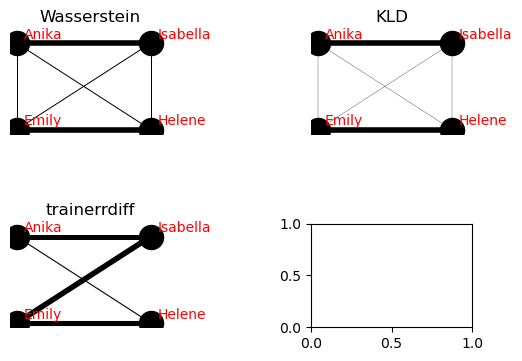

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import statistics
from scipy.stats import multivariate_normal
from scipy.stats import wasserstein_distance

for iter_node in Gin.nodes(): 
    for iter_nodej in Gin.nodes(): 
        if iter_node != iter_nodej:    
            var1 = np.var(Gin.nodes[iter_node]["y"])
            mean1 = np.mean(Gin.nodes[iter_node]["y"])
            var2 = np.var(Gin.nodes[iter_nodej]["y"])
            mean2 = np.mean(Gin.nodes[iter_nodej]["y"])
            mvn1 = multivariate_normal(mean=mean1, cov=var1)
            mvn2 = multivariate_normal(mean=mean2, cov=var2)
            w_dist = wasserstein_distance(Gin.nodes[iter_node]["y"].reshape(-1,), Gin.nodes[iter_nodej]["y"].reshape(-1,))
            Gin.add_edge(iter_node,iter_nodej) 
            Gin.edges[iter_node,iter_nodej]["kld"]=np.exp(-(kl_divergence(mvn1, mvn2)+kl_divergence(mvn2, mvn1)))
            Gin.edges[iter_node,iter_nodej]["wasserstein"]=np.exp(-w_dist/3)
            Gin.edges[iter_node,iter_nodej]["trainerrdiff"]=np.exp(-train_err_diff(Gin,iter_node,iter_nodej)/0.001)

fig, axs = plt.subplots(2, 2)  
fig.tight_layout(pad=5.0)
PlotGraph(Gin,axs[0,0],weight="wasserstein",pos='pos',annotate="name")
axs[0,0].set_title("Wasserstein")
PlotGraph(Gin,axs[0,1],weight="kld",pos='pos',annotate="name")
axs[0,1].set_title("KLD")
PlotGraph(Gin,axs[1,0],weight="trainerrdiff",pos='pos',annotate="name")
axs[1,0].set_title("trainerrdiff")
fig.tight_layout(pad=5.0)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for node in Gin.nodes(data=False): 
    print("************\n")
    clf = LinearRegression().fit(Gin.nodes[node]["X"],Gin.nodes[node]["y"])
    print("average sq. error linreg at node",node," : ",mean_squared_error(Gin.nodes[node]["y"], clf.predict(Gin.nodes[node]["X"])))

************

average sq. error linreg at node 0  :  26.397542587018346
************

average sq. error linreg at node 1  :  4.973069869839388
************

average sq. error linreg at node 2  :  8.846371377069406
************

average sq. error linreg at node 3  :  66.72308812675512


In [35]:
import numpy as np
from scipy.stats import multivariate_normal
import numpy as np

# Mean and covariance of the multivariate normal distribution
mean = np.array([0, 0])
cov = [[10, 9], [9, 10]]

# Number of samples to generate
num_samples = 100

# Generate samples from the multivariate normal distribution
samples = np.random.multivariate_normal(mean, cov, num_samples)

# Number of samples to generate
num_samples = 100

# Generate samples from the multivariate normal distribution
samples1 = np.random.multivariate_normal(mean+10*np.array([0,1]), cov, num_samples)

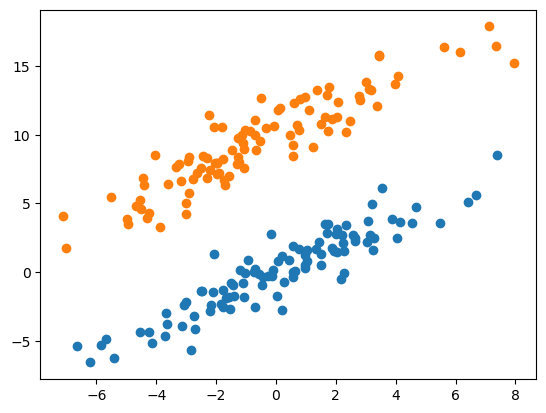

In [36]:
plt.scatter(samples[:,0],samples[:,1])
plt.scatter(samples1[:,0],samples1[:,1])

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import pandas as pd 

X, y = make_moons()
calibrated_forest = CalibratedClassifierCV(
   estimator=RandomForestClassifier(n_estimators=10))
param_grid = {
   'estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X, y)

results = pd.DataFrame.from_dict(search.cv_results_)
print(results.head())

x = np.arange(10)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.054968      0.014935         0.003508        0.000040   
1       0.047681      0.000212         0.003522        0.000027   
2       0.047631      0.000242         0.003507        0.000034   
3       0.047396      0.000256         0.003481        0.000010   

  param_estimator__max_depth                       params  split0_test_score  \
0                          2  {'estimator__max_depth': 2}               0.80   
1                          4  {'estimator__max_depth': 4}               0.95   
2                          6  {'estimator__max_depth': 6}               0.95   
3                          8  {'estimator__max_depth': 8}               0.95   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                1.0               0.85                0.9                0.9   
1                1.0               0.85                1.0                1.0   
2                1.0